In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('data/top_ratings.csv')
df.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,9.0,8.3,8.8,8.2,8.4,8.2,8.6,8.2,8.2,8.5
1,8.4,8.3,8.3,8.1,8.4,8.1,8.5,8.2,8.1,8.2
2,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1,8.1
3,8.0,8.0,8.1,7.9,8.0,8.1,8.1,8.1,8.0,8.1
4,8.0,7.9,8.0,7.8,7.9,8.0,8.1,8.0,8.0,8.0


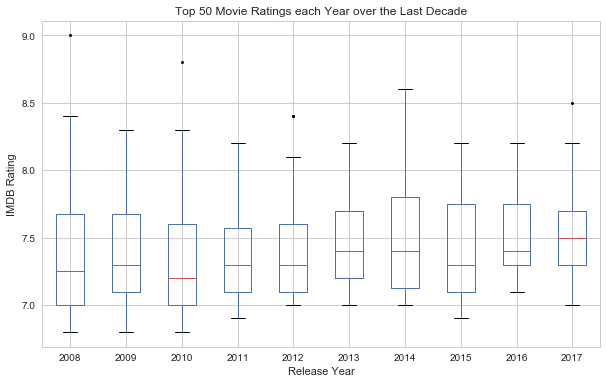

In [4]:
plt.figure(figsize = (10,6))
df.boxplot(sym='k.')
plt.ylabel('IMDB Rating')
plt.xlabel('Release Year')
plt.title('Top 50 Movie Ratings each Year over the Last Decade')

In [32]:
df.max() - df.min()

2008    2.2
2009    1.5
2010    2.0
2011    1.3
2012    1.4
2013    1.2
2014    1.6
2015    1.3
2016    1.1
2017    1.5
dtype: float64

In [4]:
def bootstrap_mean_diff(x, y):
    meanx = np.mean(np.random.choice(x, size=len(x)))
    meany = np.mean(np.random.choice(y, size=len(y)))
    return meany - meanx

In [9]:
# difference between average of rating between 2017 and 2008
mean_diff = df['2017'].mean() - df['2008'].mean()
mean_diff

0.12600000000000566

In [11]:
mean_diff_replicates = np.empty(10000)

In [12]:
for i in range(10000):
    mean_diff_replicates[i] = bootstrap_mean_diff(df['2008'], df['2017'])

In [13]:
# p-value
np.sum(mean_diff_replicates >= mean_diff) / 10000

0.50149999999999995

Such large p-value states no significant improvement in movie qualities over last decade.

## Visualization

In [5]:
import plotly
import plotly.graph_objs as go
from plotly import tools

In [6]:
plotly.offline.init_notebook_mode(connected=True)

In [18]:
data = [go.Box(y=df.iloc[:,i], name=df.columns[i]) for i in range(10)]
layout = {
    'title' : 'Top 50 Movie Ratings each Year over the Last Decade',
    'xaxis': {'title': 'Year'},
    'yaxis': {'title': 'Imdb Ratings'},
}
plotly.offline.iplot({'data':data, 'layout':layout})

In [20]:
# to save svg image of above graph
#plotly.offline.plot({'data' : data, 'layout' : layout}, show_link=False, image='svg')

In [21]:
plotly.offline.plot({'data' : data, 'layout' : layout}, validate=False, show_link=False, include_plotlyjs=False, output_type='div')

'<div id="0916e073-6583-4772-87f6-3c214e8dacaa" style="height: 100%; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("0916e073-6583-4772-87f6-3c214e8dacaa", [{"name": "2008", "y": [9.0, 8.4, 8.1, 8.0, 8.0, 7.9, 7.9, 7.9, 7.8, 7.8, 7.8, 7.8, 7.7, 7.6, 7.6, 7.6, 7.6, 7.6, 7.5, 7.5, 7.5, 7.5, 7.3, 7.3, 7.3, 7.2, 7.2, 7.2, 7.2, 7.2, 7.1, 7.1, 7.1, 7.1, 7.1, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.8], "type": "box"}, {"name": "2009", "y": [8.3, 8.3, 8.1, 8.0, 7.9, 7.9, 7.8, 7.8, 7.7, 7.7, 7.7, 7.7, 7.7, 7.6, 7.6, 7.6, 7.6, 7.6, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.3, 7.3, 7.3, 7.3, 7.3, 7.2, 7.2, 7.2, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.9, 6.9, 6.8], "type": "box"}, {"name": "2010", "y": [8.8, 8.3, 8.1, 8.1, 8.0, 8.0, 7.8, 7.8, 7.7, 7.7, 7.7, 7.7, 7.6, 7.6, 7.6, 7.6, 7.6, 7.5, 7.4, 7.4, 7.4, 7.3, 7.